In [1]:
import numpy as np


In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]

In [4]:
c1

array([ 0.93636116,  0.29854881,  0.18465208])

In [5]:
W = V.T[:,:2]

In [6]:
X_reduced = X.dot(W)

In [7]:
X.shape

(60, 3)

In [8]:
X_reduced.shape

(60, 2)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components =2)

In [11]:
X_reduced = pca.fit_transform(X)

In [12]:
pca.components_.T[:,0]

array([-0.93636116, -0.29854881, -0.18465208])

In [14]:
pca.explained_variance_ratio_


array([ 0.84248607,  0.14631839])

In [15]:
pca = PCA()

In [16]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [19]:
np.argmax(cumsum>0.95)+1

2

In [20]:
pca = PCA(n_components = 0.95)

In [21]:
X_reduced = pca.fit_transform(X)

In [22]:
from sklearn.datasets import fetch_mldata

In [23]:
mnist = fetch_mldata('MNIST original')

In [24]:
X , y = mnist['data'],mnist['target']

In [25]:
pca = PCA(n_components = 154)

In [26]:
X_reduced = pca.fit_transform(X)

In [27]:
X_reduced.shape

(70000, 154)

In [28]:
X_recovered = pca.inverse_transform(X_reduced)

In [36]:
import matplotlib.pyplot as plt
import matplotlib
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

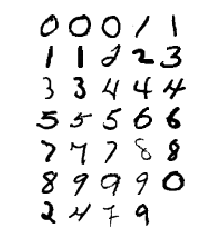

In [37]:
plot_digits(X[::2100])

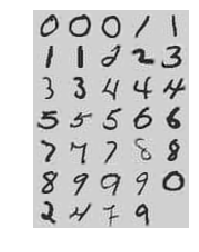

In [38]:
plot_digits(X_recovered[::2100])

In [39]:
from sklearn.decomposition import IncrementalPCA

In [40]:
inc_pca = IncrementalPCA(n_components=154)

In [43]:
for X_train in np.array_split(X,100):
    inc_pca.partial_fit(X_train)
X_reduced = inc_pca.transform(X)

In [46]:
ran_pca = PCA(n_components=154,svd_solver = 'randomized')
X_reduced  = ran_pca.fit_transform(X)

In [47]:
from sklearn.decomposition import KernelPCA

In [48]:
from sklearn.datasets import make_swiss_roll

In [49]:
X, y =make_swiss_roll(n_samples =1000,noise = 0.2,random_state =42)

In [50]:
ker_pca = KernelPCA(n_components = 2,kernel = 'rbf',gamma =0.3)

In [51]:
X_reduced = ker_pca.fit_transform(X)

In [52]:
X_reduced.shape

(1000, 2)

In [54]:
from sklearn.pipeline import Pipeline

In [55]:
from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.linear_model import LogisticRegression

In [60]:
pca_pipe = Pipeline([("kpca",KernelPCA(n_components =2)),("log_reg ",LogisticRegression())])

In [64]:
param_grid = {"kpca__kernel":['rbf','sigmoid'],"kpca__gamma":np.linspace(0.03,0.05,10)}

In [69]:
grid_search = GridSearchCV(pca_pipe,param_grid,cv = 3)

In [73]:
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg ', LogisticRegr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kpca__kernel': ['rbf', 'sigmoid'], 'kpca__gamma': array([ 0.03   ,  0.03222,  0.03444,  0.03667,  0.03889,  0.04111,
        0.04333,  0.04556,  0.04778,  0.05   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
y = y>6.9

In [72]:
y

array([ True,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [76]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

In [100]:
rbf_pca = KernelPCA(n_components =2, kernel ='rbf', gamma = 0.043,fit_inverse_transform = True)

In [101]:
X_reduced = rbf_pca.fit_transform(X)

In [102]:
X_recovered = rbf_pca.inverse_transform(X_reduced)

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
mean_squared_error(X,X_recovered)

32.705363529544698

In [106]:
from sklearn.manifold import LocallyLinearEmbedding

In [108]:
lle = LocallyLinearEmbedding(n_components = 2,n_neighbors = 10)

In [109]:
X_reduced = lle.fit_transform(X)

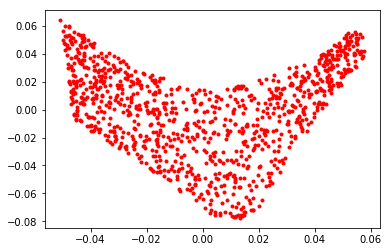

In [110]:
plt.plot(X_reduced[:,0],X_reduced[:,1],'r.')

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X_train , y_train,X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [5]:
import numpy as np

In [6]:
shuffled_indices = np.random.permutation(60000)

In [42]:
shuffled_indices

array([14271, 34706, 23666, ..., 28139,  2507,  1981])

In [7]:
X_train, y_train = X_train[shuffled_indices], y_train[shuffled_indices]

In [44]:
import time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier() 

In [45]:
start = time.time()
forest_clf.fit(X_train,y_train)
end = time.time()

In [46]:
end - start

4.008335590362549

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components = 0.95)

In [52]:
X_reduced = pca.fit_transform(X_train)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
y_pred = forest_clf.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.94820000000000004

In [53]:
forest_clf = RandomForestClassifier()

In [54]:
start = time.time()
forest_clf.fit(X_reduced,y_train)
end = time.time()

In [55]:
end - start

10.079928636550903

In [56]:
X_test_reduced = pca.transform(X_test)

In [57]:
y_pred = forest_clf.predict(X_test_reduced)

In [58]:
accuracy_score(y_test,y_pred)

0.89510000000000001

In [8]:
import matplotlib.pyplot as plt

In [9]:
import matplotlib

In [62]:
from sklearn.manifold import TSNE

In [65]:
tsne = TSNE(n_components =2)

In [ ]:
X_reduced = tsne.fit_transform(X_train)

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

In [15]:
lle_pca = LocallyLinearEmbedding(n_components =2)

In [ ]:
X_reduced = lle_pca.fit_transform(X_train)

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds_pca = MDS(n_components = 2)

In [ ]:
X_reduced = mds_pca.fit_transform(X_train)

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2)

In [12]:
X_reduced = pca.fit_transform(X_train)

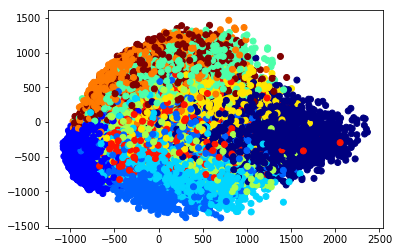

In [13]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")